In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.optimize as opt
import scipy.interpolate as interp
import scipy.integrate as integ
import scipy.special as sc
import h5py as h5
import os.path
import matplotlib.ticker
from matplotlib import cm

from numba import jit, njit, prange

plt.rc('figure', figsize=(12, 9))
plt.rcParams.update({'text.usetex': True,
                     'font.family': 'serif',
                     'font.serif': ['Georgia'],
                     'mathtext.fontset': 'cm',
                     'lines.linewidth': 2.5,
                     'font.size': 20,
                     'xtick.labelsize': 'large',
                     'ytick.labelsize': 'large',
                     'xtick.direction': 'in',
                     'ytick.direction': 'in',
                     'xtick.major.width': 1.7,
                     'ytick.major.width': 1.7,
                     'xtick.major.size': 7.,
                     'ytick.major.size': 7.,
                     'ytick.right':True, 
                     'axes.labelsize': 'large',
                     'axes.titlesize': 'large',
                     'axes.grid': False,
                     'grid.alpha': 0.5,
                     'lines.markersize': 12,
                     'legend.borderpad': 0.2,
                     'legend.fancybox': True,
                     'legend.fontsize': 17,
                     'legend.framealpha': 0.7,
                     'legend.handletextpad': 0.5,
                     'legend.labelspacing': 0.2,
                     'legend.loc': 'best',
                     'savefig.bbox': 'tight',
                     'savefig.pad_inches': 0.05,
                     'savefig.dpi': 80,
                     'pdf.compression': 9})

from src.constants import *
from src import waveform as wave

In [10]:
M1, M2 = 1.35*Ms, 1.35*Ms
R1, R2 = 11.7e3, 11.7e3
rM1 = G*M1/c**2
rM2 = G*M2/c**2
tMt = G*(M1+M2)/c**3.

kwargs = {
    'dt':1/2**14,
    'mass1':1.35,
    'mass2':1.35,
    'spin1z':-0.20107613008072192, 
    'spin2z':0,
    'r_M_init': 18., 
    'phi_init':0,
    'iota':np.pi/2., 
    'R1_M1':R1/rM1,
    'I1_M1_3':12.34,
    'lam1_l2_M1_5':389.,
    'lam1_l3_M1_7':700.,
    'M1wa01_l2':0.07934,
    'M1wa01_l3':0.1067,
    'C1_l2':-0.25,
    'C1_l3':-1./3,
    'll1':np.array([2, 2, 2, 3, 3]),
    'mm1':np.array([2, 0, -2, 3, -3]),
    'Ces1':6,
    'R2_M2':R2/rM2,
    'I2_M2_3':12.34,
    'lam2_l2_M2_5':389.,
    'lam2_l3_M2_7':700.,
    'M2wa02_l2':0.07934,
    'M2wa02_l3':0.1067,
    'C2_l2':-0.25,
    'C2_l3':-1./3,
    'll2':np.array([2, 2, 2, 3, 3]),
    'mm2':np.array([2, 0, -2, 3, -3]),
    'Ces2':6,
    'atol':1e-8,
    'rtol':1e-8,
    'order':4,
    'dlogvar':2e-4,
}

tt, hDL_M_modes = wave.get_hDL_M_modes_vs_t(**kwargs)
__, hDL_M_p, hDL_M_c = wave.get_hDL_M_pc_vs_t(**kwargs)

0.675 1.2062882454792e+47
[ 0.25        0.5         0.5        -0.20107613  0.         -0.03258932
  0.          6.          6.          0.34075963  0.34075963 12.15625
  5.46875    12.15625     5.46875   ]
[ 1.80000000e+01 -5.95120358e-04  0.00000000e+00  4.65506454e+00
  1.57646401e-03 -7.65283914e-04  5.66129648e-04 -1.25640370e-04
  4.32570589e-05  2.07951638e-06 -4.58578991e-07  2.17013666e-07
 -1.66258552e-07  1.64352922e-08  9.95897319e-04 -7.65283914e-04
  7.16029323e-04  7.87085001e-05 -5.44314667e-05  7.86991268e-07
 -4.58578991e-07  3.41423577e-07  6.22375242e-08 -2.56805467e-08]
[0.08386997 0.08387005 0.08387086 ... 0.01539477 0.0046326  0.        ]
[2.83930538e-04 2.83931138e-04 2.83937147e-04 ... 9.94946646e-05
 2.86950312e-05 0.00000000e+00]
[9.07647232e-06 9.07650154e-06 9.07679370e-06 ... 9.34619507e-05
 2.82174065e-05 0.00000000e+00]
[3.12284944e-04 3.12285548e-04 3.12291585e-04 ... 1.75959850e-04
 5.31852914e-05 0.00000000e+00]
[0.00084397 0.00084397 0.00084399 ... 0

(6771.3590366993085, 7266.3590366993085)

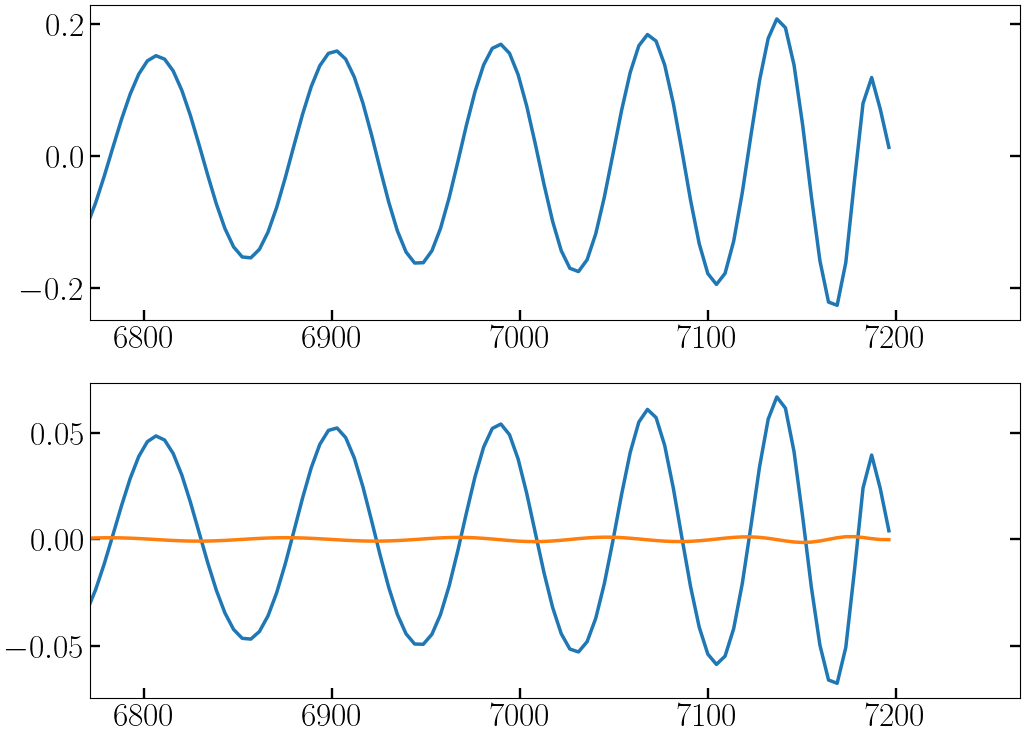

In [12]:
fig=plt.figure()
ax1=fig.add_subplot(211)
ax1.plot(tt/tMt, np.real(hDL_M_modes[0, :]))
ax1.set_xlim([np.max(tt/tMt)-425, np.max(tt/tMt)+70])

ax2=fig.add_subplot(212)
ax2.plot(tt/tMt, hDL_M_p)
ax2.plot(tt/tMt, hDL_M_c)
# ax2.plot(tt/tMt, np.sqrt(hDL_M_p**2. + hDL_M_c**2.))
ax2.set_xlim(ax1.get_xlim())

In [10]:
2**14

16384